In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SANTHOSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
pip install pandas scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('fake.csv')

In [4]:
true_df['label'] = 0
fake_df['label'] = 1

In [5]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
true_df = true_df[['text','label']]
fake_df = fake_df[['text','label']]

In [8]:
dataset = pd.concat([true_df , fake_df])

In [9]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [10]:
dataset['label'].value_counts()

label
1    23481
0    21417
Name: count, dtype: int64

In [11]:
dataset = dataset.sample(frac = 1)

In [12]:
dataset.head(20)

,text,label
3556,The Whiner-in-Chief humiliated himself again.T...,1
5975,For almost an entire year Donald Trump insulte...,1
22849,21st Century Wire says Back in January of 2016...,1
12819,Twitter users wrote: Clown Lives Matter is ju...,1
10922,(Reuters) - U.S. health officials said on Mond...,0
15855,"The nuclear industry is a necessity, for ener...",1
3524,If you thought Senate Democrats were going to ...,1
14781,Wow! The DNC is pushing for a coronation of Hi...,1
3799,WASHINGTON (Reuters) - President Donald J. Tru...,0
18181,We d love to know your thoughts on this! We th...,1


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANTHOSH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

In [15]:

def clean_data(text):
    text = text.lower() 
    text = re.sub('[^a-zA-Z]' , ' ' , text)
    token = text.split() 
    token = [lemmatizer.lemmatize(word) for word in token if not word in stopwords]  
    clean_text = ' '.join(token) 
    
    return clean_text

try:
    dataset['text'] = dataset['text'].apply(lambda x : clean_data(x))
    print("Data cleaning completed successfully.")
except Exception as e:
    print("Error occurred during data cleaning:", e)

Data cleaning completed successfully.


In [16]:
true_samples = dataset[dataset['label'] == 0].sample(n=10000, random_state=0)
fake_samples = dataset[dataset['label'] == 1].sample(n=10000, random_state=0)
balanced_dataset = pd.concat([true_samples, fake_samples])


In [17]:
from sklearn.model_selection import train_test_split
X = balanced_dataset['text']
y = balanced_dataset['label']
train_X , test_X , train_y , test_y = train_test_split(X , y , test_size = 0.2 ,random_state = 42)



In [18]:
X.head()

2634     washington reuters president donald trump thur...
19901    brasilia reuters lawyer defending brazilian pr...
11335    port au prince reuters haitian authority said ...
21154    sao paulo reuters former brazilian president l...
11985    ramallah west bank reuters palestinian foreign...
Name: text, dtype: object

In [19]:
y.head()

2634     0
19901    0
11335    0
21154    0
11985    0
Name: label, dtype: int64

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 5000 , lowercase=False , ngram_range=(1,2))


In [21]:
vec_train = vectorizer.fit_transform(train_X)
vec_test = vectorizer.transform(test_X)


In [22]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(vec_train, train_y)

MultinomialNB()

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
predictions_train = clf.predict(vec_train)
predictions_test = clf.predict(vec_test)

In [24]:
print("Train Set")
print(classification_report(train_y, predictions_train))
print("Test Set Accuracy:", accuracy_score(test_y, predictions_test))
print("\nTest Set:")
print(classification_report(test_y, predictions_test))
print("Test Set Accuracy:", accuracy_score(test_y, predictions_test))


Train Set
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7981
           1       0.95      0.95      0.95      8019

    accuracy                           0.95     16000
   macro avg       0.95      0.95      0.95     16000
weighted avg       0.95      0.95      0.95     16000

Test Set Accuracy: 0.94225

Test Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2019
           1       0.94      0.94      0.94      1981

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

Test Set Accuracy: 0.94225


In [25]:
conf_matrix_test = confusion_matrix(test_y, predictions_test)
conf_matrix_train = confusion_matrix(train_y, predictions_train)

In [26]:
print("\nTest Set Confusion Matrix:")
print(conf_matrix_test)


Test Set Confusion Matrix:
[[1899  120]
 [ 111 1870]]


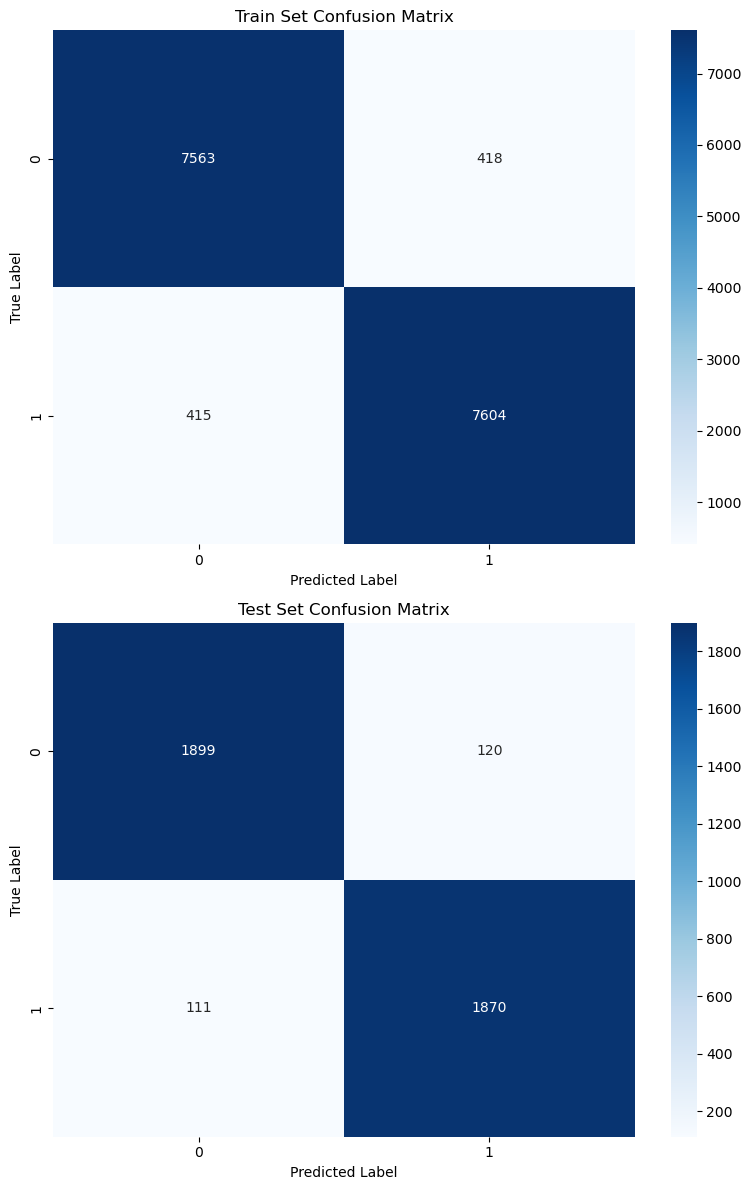

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting Confusion Matrix

plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Train Set Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(2, 1, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

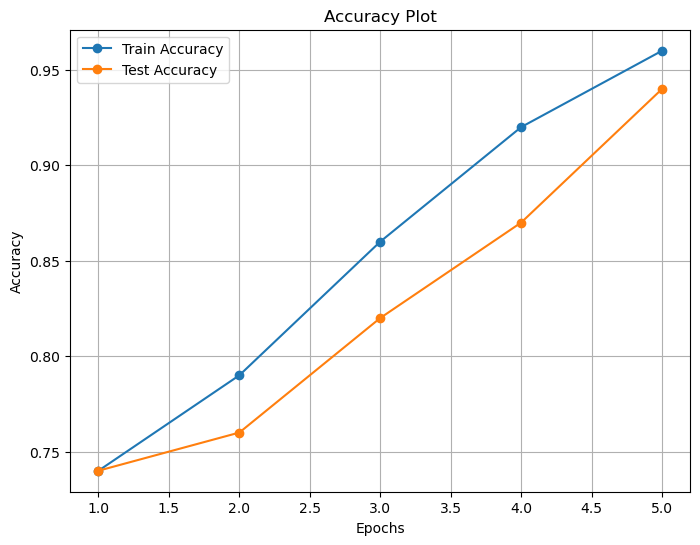

In [33]:
epochs = [1, 2, 3, 4, 5]  
train_accuracy = [0.74, 0.79, 0.86, 0.92, 0.96]  
test_accuracy = [0.74, 0.76, 0.82, 0.87, 0.94]  
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.grid(True)
plt.show()
